In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, k_means
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [4]:
df = pd.read_csv('/Users/jakirice/Desktop/dishes.csv')
df

,food item,calories,carbohydrates,proteins,total fat
0,Aloo-Baigan,103,32,1,5.0
1,Aloo Curry,105,15,1,5.0
2,Bhindi (Okra0,161,12,4,11.0
3,Cabbage,131,7,2,5.0
4,Chole,74,3,4,4.0
5,Besan Khasi,100,15,3,5.0
6,Mutter Paneer,147,11,9,8.0
7,Pumpkin,67,7,2,4.0
8,Koffa Curry,147,13,3,9.0
9,Chana Dahi,99,13,5,3.0


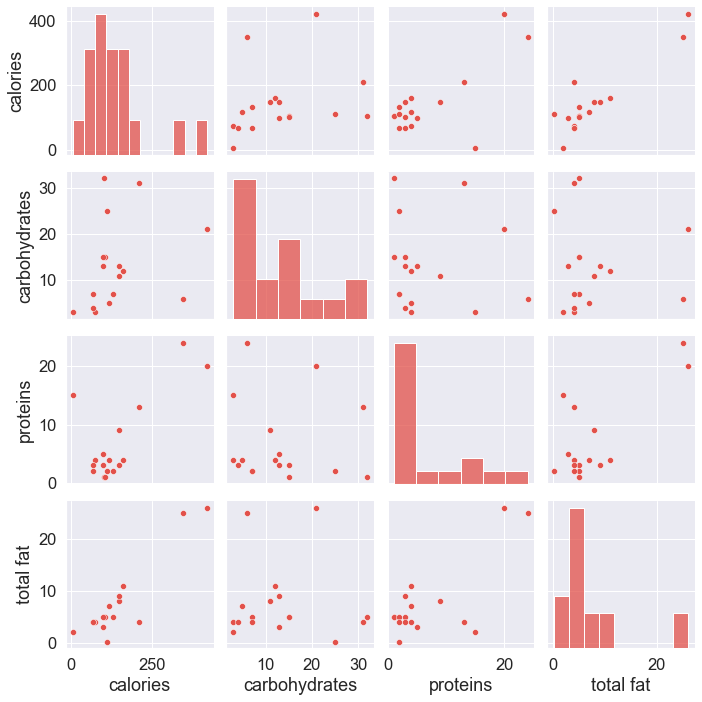

In [5]:
sns.pairplot(df[['calories','carbohydrates','proteins','total fat']])

In [6]:
x = df.iloc[:, [1,2,3,4]].values

In [7]:
x

array([[1.03e+02, 3.20e+01, 1.00e+00, 5.00e+00],
       [1.05e+02, 1.50e+01, 1.00e+00, 5.00e+00],
       [1.61e+02, 1.20e+01, 4.00e+00, 1.10e+01],
       [1.31e+02, 7.00e+00, 2.00e+00, 5.00e+00],
       [7.40e+01, 3.00e+00, 4.00e+00, 4.00e+00],
       [1.00e+02, 1.50e+01, 3.00e+00, 5.00e+00],
       [1.47e+02, 1.10e+01, 9.00e+00, 8.00e+00],
       [6.70e+01, 7.00e+00, 2.00e+00, 4.00e+00],
       [1.47e+02, 1.30e+01, 3.00e+00, 9.00e+00],
       [9.90e+01, 1.30e+01, 5.00e+00, 3.00e+00],
       [2.11e+02, 3.10e+01, 1.30e+01, 4.00e+00],
       [5.00e+00, 3.00e+00, 1.50e+01, 2.00e+00],
       [1.11e+02, 2.50e+01, 2.00e+00, 2.00e-01],
       [1.17e+02, 5.00e+00, 4.00e+00, 7.00e+00],
       [6.70e+01, 4.00e+00, 3.00e+00, 4.00e+00],
       [4.21e+02, 2.10e+01, 2.00e+01, 2.60e+01],
       [3.48e+02, 6.00e+00, 2.40e+01, 2.50e+01]])

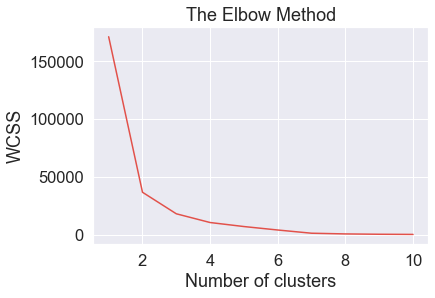

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [10]:
y_kmeans

array([0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1], dtype=int32)

In [11]:
kmeans.cluster_centers_

array([[ 84.8 ,  12.2 ,   4.  ,   3.92],
       [384.5 ,  13.5 ,  22.  ,  25.5 ],
       [159.4 ,  14.8 ,   6.2 ,   7.4 ]])

In [12]:
df['Clusters']=kmeans.labels_

In [13]:
df

,food item,calories,carbohydrates,proteins,total fat,Clusters
0,Aloo-Baigan,103,32,1,5.0,0
1,Aloo Curry,105,15,1,5.0,0
2,Bhindi (Okra0,161,12,4,11.0,2
3,Cabbage,131,7,2,5.0,2
4,Chole,74,3,4,4.0,0
5,Besan Khasi,100,15,3,5.0,0
6,Mutter Paneer,147,11,9,8.0,2
7,Pumpkin,67,7,2,4.0,0
8,Koffa Curry,147,13,3,9.0,2
9,Chana Dahi,99,13,5,3.0,0


In [14]:
df['Clusters'].value_counts()

0    10
2     5
1     2
Name: Clusters, dtype: int64

In [15]:
df.groupby(['Clusters']).mean()

,calories,carbohydrates,proteins,total fat
Clusters,,,,
0,84.8,12.2,4.0,3.92
1,384.5,13.5,22.0,25.50
2,159.4,14.8,6.2,7.40
